In [ ]:
## om namah shivay

In [ ]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Sequential

In [ ]:

def np_cos(x):
  return np.cos(np.deg2rad(x))
def np_sin(x):
  return np.sin(np.deg2rad(x))

def rotation_x(deg_x):
  return np.array([[1,0,0],
                   [0,np_cos(deg_x),-np_sin(deg_x)],
                   [0,np_sin(deg_x),np_cos(deg_x)]])
def rotation_y(deg_y):
  return np.array([[np_cos(deg_y),0,np_sin(deg_y)],
                   [0,1,0],
                   [-np_sin(deg_y),0,np_cos(deg_y)]])
def rotation_z(deg_z):
  return np.array([[np_cos(deg_z),-np_sin(deg_z),0],
                   [np_sin(deg_z),np_cos(deg_z),0],
                   [0,0,1]])
def rotation_matrix(deg_x,deg_y,deg_z):
  return rotation_x(deg_x)@rotation_y(deg_y)@rotation_z(deg_z)
def cam_matrix():
  focal_length=640
  c_x=640/2
  c_y=480/2
  return np.array([[focal_length,0,c_x],
          [0,focal_length,c_y],
          [0,0,1]])
def projection_mat(deg_x,deg_y,deg_z,t_x,t_y,t_z):
  rotation_mat=rotation_matrix(deg_x,deg_y,deg_z)
  rotation_mat*=t_z
  translation_mat=np.array([[t_x],
                   [t_y],
                   [0]])
#   return cam_matrix()@np.hstack((rotation_mat,translation_mat))
  return np.hstack((rotation_mat,translation_mat))


def translate(x,y,z,coords):

  coords=np.transpose(coords)

  new_coords=np.copy(coords)
  new_coords=new_coords.astype('float64')

  new_coords[:,0]+=x
  new_coords[:,1]+=y
  new_coords[:,2]+=z

  return new_coords

def get_random_matrix():
  deg_x=random.randint(-80,80)
  deg_y=random.randint(-80,80)
  deg_z=random.randint(-160,160)
  t_x=random.randint(-300,300)
  t_y=random.randint(-220,220)
  t_z=random.uniform(0.4,1.6)
  return deg_x,deg_y,deg_z,t_x,t_y,t_z,projection_mat(deg_x,deg_y,deg_z,t_x,t_y,t_z)


def graphics(coords):
  new_coords=np.copy(coords)

  new_coords=new_coords.astype('int64')
  image=np.zeros((480,640,3),dtype='float64')

  cv2.circle(image,new_coords[0,:2],2,color=(0,225,255),thickness=-1)
  cv2.circle(image,new_coords[1,:2],2,color=(0,225,255),thickness=-1)
  cv2.circle(image,new_coords[2,:2],2,color=(0,225,255),thickness=-1)
  cv2.circle(image,new_coords[3,:2],2,color=(0,225,255),thickness=-1)
  cv2.circle(image,new_coords[4,:2],2,color=(0,225,255),thickness=-1)
  cv2.circle(image,new_coords[5,:2],2,color=(0,225,255),thickness=-1)
  return image

In [ ]:
cube_coords=np.array([[ 0.0, 0.0, 0.0,1],
                    [ 0.0, 66.0, 13.0,1],
                    [45.0, -34.0, 27.0,1],
                    [ -45.0, -34.0, 27.0,1],
                    [30.0, 30.0, 25.0,1],
                    [-30.0, 30.0, 25.0,1]])
cube_coords=cube_coords.astype('float64')

In [ ]:
deg_x,deg_y,deg_z,t_x,t_y,t_z,pro_mat=get_random_matrix()
transpose_pro_mat=np.transpose(pro_mat)
cube_coords=cube_coords@transpose_pro_mat
cube_coords=np.transpose(cube_coords)
img=graphics(translate(320,240,0,cube_coords))

In [ ]:
cube_coords

array([[-24.        ,  -3.42357713,  11.78053612, -73.92673922,
         15.92015024, -41.21803333],
       [187.        , 248.06257067, 138.45465351, 163.29221995,
        203.83070219, 220.38907981],
       [  0.        ,  19.61510066,  16.83094085,  29.41835952,
         23.54615706,  31.9377695 ]])

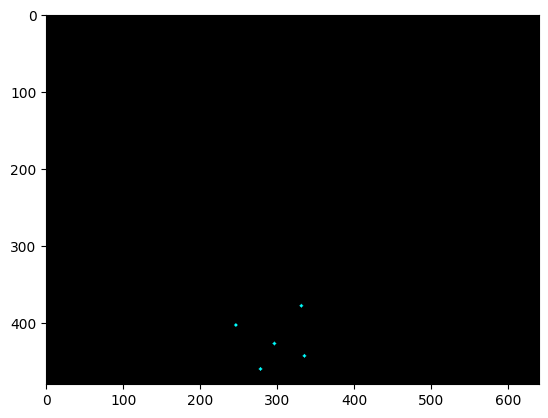

In [ ]:
plt.imshow(img)

In [14]:
## data generator
def data_generator(batch_size):
  while True:
    x=[]
    y=[]
    for i in range(batch_size):
      cube_coords=np.array([[ 0.0, 0.0, 0.0,1],
                    [ 0.0, 66.0, 13.0,1],
                    [45.0, -34.0, 27.0,1],
                    [ -45.0, -34.0, 27.0,1],
                    [30.0, 30.0, 25.0,1],
                    [-30.0, 30.0, 25.0,1]])
      cube_coords=cube_coords.astype('float64')
      deg_x,deg_y,deg_z,t_x,t_y,t_z,pro_mat=get_random_matrix()
      transpose_pro_mat=np.transpose(pro_mat)
      cube_coords=cube_coords@transpose_pro_mat
      cube_coords=cube_coords[:,:2]
      cube_coords=cube_coords.flatten()
      y.append([deg_x,deg_y,deg_z,t_x,t_y,t_z])
      x.append(cube_coords)
    yield np.array(x),np.array(y)






In [15]:
val_lab_gen=data_generator(32)

In [16]:
a=next(val_lab_gen)

In [17]:
a,b=a

In [18]:
a.shape

(32, 12)

In [19]:
b.shape

(32, 6)

In [20]:
def create_ann_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(12,)),
        Flatten(),  # Flatten layer to convert (32, 12) to (32*12,)
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(6)  # Output layer with no activation function for linear outputs
    ])
    return model

# Create an instance of the model
model = create_ann_model()

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mean_absolute_error'])  # Use mean absolute error as a metric

# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 9542 (37.27 KB)
Trainable params: 9542 (37.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history=model.fit(val_lab_gen,epochs=20,steps_per_epoch=3200)

Epoch 1/20
3200/3200 [==============================] - 29s 9ms/step - loss: 237.9577 - mean_absolute_error: 9.3094
Epoch 2/20
3200/3200 [==============================] - 24s 8ms/step - loss: 120.6295 - mean_absolute_error: 6.7442
Epoch 3/20
3200/3200 [==============================] - 24s 8ms/step - loss: 54.6252 - mean_absolute_error: 4.6661
Epoch 4/20
3200/3200 [==============================] - 24s 8ms/step - loss: 35.1728 - mean_absolute_error: 3.7051
Epoch 5/20
3200/3200 [==============================] - 24s 7ms/step - loss: 29.1802 - mean_absolute_error: 3.2871
Epoch 6/20
3200/3200 [==============================] - 23s 7ms/step - loss: 25.9625 - mean_absolute_error: 2.9824
Epoch 7/20
3200/3200 [==============================] - 23s 7ms/step - loss: 20.7460 - mean_absolute_error: 2.6312
Epoch 8/20
3200/3200 [==============================] - 25s 8ms/step - loss: 22.4383 - mean_absolute_error: 2.6604
Epoch 9/20
3200/3200 [==============================] - 25s 8ms/step - loss: 1

In [ ]:
x,y=next(val_lab_gen)

In [ ]:
y_predicted=model.predict(x)

1/1 [==============================] - 0s 21ms/step


In [ ]:
listt=np.abs(y_predicted-y)

In [ ]:
np.mean(listt[:,0]),listt[:,0]

(2.7913509160280228,
 array([2.73164082, 1.66351891, 2.43959045, 4.04168701, 1.98603535,
        4.7429657 , 1.39702606, 2.02714157, 1.53804398, 1.47687149,
        0.56522942, 2.92499542, 4.32622528, 1.55716133, 1.6428566 ,
        8.05321884, 6.56135559, 5.3061409 , 3.40299988, 1.48587227,
        2.27985096, 3.78098106, 6.31489754, 5.41880608, 1.31545258,
        0.07204676, 2.38075638, 0.66907501, 0.38843155, 2.16583824,
        3.00636768, 1.66014862]))

In [ ]:
np.mean(listt[:,1]),listt[:,1]


(1.101214163005352,
 array([1.89839172e+00, 1.53827667e-01, 2.70661354e+00, 1.17111206e-03,
        1.06461716e+00, 5.16723633e-01, 1.14611435e+00, 2.28324890e-01,
        1.52335739e+00, 3.12953949e-01, 9.24823761e-01, 1.84842110e+00,
        5.11805534e-01, 2.02147293e+00, 1.43539810e+00, 8.01918030e-01,
        1.53133392e-01, 3.59764099e-01, 1.99478149e-01, 6.04047775e-01,
        1.27143860e+00, 1.71551895e+00, 4.05128479e-01, 1.00791359e+00,
        6.44149780e-01, 2.80334163e+00, 1.04330635e+00, 3.13148499e-02,
        3.09457779e+00, 1.99752426e+00, 8.16665649e-01, 1.99561501e+00]))

In [ ]:
np.mean(listt[:,2]),listt[:,2]


(2.4306670427322388,
 array([1.4546051 , 1.72509003, 4.43297577, 6.13777161, 3.84069061,
        0.99199677, 1.61296082, 5.33675766, 0.33496094, 1.62473679,
        0.6534996 , 0.1384697 , 2.05738068, 3.87533569, 1.45439911,
        6.89699554, 2.84082031, 0.79644012, 1.75235748, 2.23439789,
        2.2492981 , 4.92423248, 3.76928711, 2.49482727, 2.3448019 ,
        1.77637482, 2.10480976, 1.66984558, 0.26840973, 4.00634766,
        0.69815063, 1.28231812]))

In [ ]:
np.mean(listt[:,3]),listt[:,3]

(1.1773544549942017,
 array([1.11267853, 0.89058685, 0.32997131, 1.94300842, 2.1928978 ,
        0.43701935, 0.9367218 , 0.9470253 , 0.41140366, 1.00485229,
        1.96874237, 1.07038116, 0.29748535, 1.52749634, 1.14325714,
        2.21522522, 0.79441833, 0.17903137, 2.55914307, 1.18600845,
        0.80892944, 0.21858215, 1.22311401, 1.69042969, 2.32471848,
        1.55978394, 1.10670471, 1.91208649, 0.68691254, 0.65019226,
        1.2481842 , 1.09835052]))

In [ ]:
np.mean(listt[:,4]),listt[:,4]

(1.1398900747299194,
 array([0.13008451, 2.07633972, 0.33516693, 1.27973938, 0.96248627,
        0.43846893, 0.30207062, 0.22361755, 1.33883667, 0.09589386,
        0.53052187, 0.91952515, 0.4683609 , 1.80249977, 1.5740509 ,
        0.42340088, 0.08381653, 0.42394257, 1.74922752, 1.48391724,
        1.49224091, 2.69288635, 1.04100037, 1.90013885, 0.69664001,
        2.17430115, 1.59513092, 2.15262604, 1.56413269, 0.58561707,
        2.54000473, 1.39979553]))

In [ ]:
np.mean(listt[:,5]),listt[:,5]

(0.1308382122767854,
 array([0.11396616, 0.18231743, 0.16763667, 0.11101847, 0.14749557,
        0.07791508, 0.10164299, 0.14939756, 0.07430252, 0.18468069,
        0.05119082, 0.17603973, 0.10255063, 0.07936773, 0.0747798 ,
        0.0853461 , 0.34243064, 0.03130358, 0.15309265, 0.18767946,
        0.05410154, 0.029204  , 0.29897364, 0.24012389, 0.03732682,
        0.18024003, 0.14478868, 0.18985502, 0.13619259, 0.04839991,
        0.13760313, 0.09585924]))

In [ ]:
x[2]

array([-106.        ,   53.        , -110.36973142,   20.53426064,
       -131.87471355,   69.45859809,  -98.27647849,   72.62079177,
       -125.60274133,   37.93374492, -103.20391796,   40.04187404])

In [ ]:
y[2]

array([  -6.        ,  -42.        ,  180.        , -106.        ,
         53.        ,    0.50234316])

In [ ]:
model_json=model.to_json()

In [ ]:
with open("head_pose_model_json","w") as filee:
  filee.write(model_json)

In [ ]:
model.save_weights("head_pose_model_weights.h5")